containerName: String = ibf
storageAccountName: String = 510datalakestorage
sas: String = sp=racwdlmeop&st=2021-04-22T10:21:36Z&se=2022-06-30T18:21:36Z&spr=https&sv=2020-02-10&sr=c&sig=JJF1x4fYfy2mtK78HUy7Aa4MpCJ%2Fu9jtqSneUUQkJ0c%3D
config: String = fs.azure.sas.ibf.510datalakestorage.blob.core.windows.net

In [0]:
%scala
dbutils.fs.mount(
  source = "wasbs://ibf@510datalakestorage.blob.core.windows.net/",
  mountPoint = "/mnt/TyphoonData",
  extraConfigs = Map(config -> sas))

java.lang.IllegalArgumentException: requirement failed: Directory already mounted: /mnt/TyphoonData
	at com.databricks.backend.daemon.data.client.DbfsClient.send0(DbfsClient.scala:128)
	at com.databricks.backend.daemon.data.client.DbfsClient.sendIdempotent(DbfsClient.scala:68)
	at com.databricks.backend.daemon.dbutils.DBUtilsCore.mount(DBUtilsCore.scala:470)
	at com.databricks.dbutils_v1.impl.DbfsUtilsImpl.mount(DbfsUtilsImpl.scala:85)
	at linee5388f4f53134ef0862ed1c14167f14627.$read$$iw$$iw$$iw$$iw$$iw$$iw.<init>(command-4125531506930399:4)
	at linee5388f4f53134ef0862ed1c14167f14627.$read$$iw$$iw$$iw$$iw$$iw.<init>(command-4125531506930399:49)
	at linee5388f4f53134ef0862ed1c14167f14627.$read$$iw$$iw$$iw$$iw.<init>(command-4125531506930399:51)
	at linee5388f4f53134ef0862ed1c14167f14627.$read$$iw$$iw$$iw.<init>(command-4125531506930399:53)
	at linee5388f4f53134ef0862ed1c14167f14627.$read$$iw$$iw.<init>(command-4125531506930399:55)
	at linee5388f4f53134ef0862ed1c14167f14627.$read$$iw.<init>(command-4125531506930399:57)
	at linee5388f4f53134ef0862ed1c14167f14627.$read.<init>(command-4125531506930399:59)
	at linee5388f4f53134ef0862ed1c14167f14627.$read$.<init>(command-4125531506930399:63)
	at linee5388f4f53134ef0862ed1c14167f14627.$read$.<clinit>(command-4125531506930399)
	at linee5388f4f53134ef0862ed1c14167f14627.$eval$.$print$lzycompute(<notebook>:7)
	at linee5388f4f53134ef0862ed1c14167f14627.$eval$.$print(<notebook>:6)
	at linee5388f4f53134ef0862ed1c14167f14627.$eval.$print(<notebook>)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at scala.tools.nsc.interpreter.IMain$ReadEvalPrint.call(IMain.scala:745)
	at scala.tools.nsc.interpreter.IMain$Request.loadAndRun(IMain.scala:1021)
	at scala.tools.nsc.interpreter.IMain.$anonfun$interpret$1(IMain.scala:574)
	at scala.reflect.internal.util.ScalaClassLoader.asContext(ScalaClassLoader.scala:41)
	at scala.reflect.internal.util.ScalaClassLoader.asContext$(ScalaClassLoader.scala:37)
	at scala.reflect.internal.util.AbstractFileClassLoader.asContext(AbstractFileClassLoader.scala:41)
	at scala.tools.nsc.interpreter.IMain.loadAndRunReq$1(IMain.scala:573)
	at scala.tools.nsc.interpreter.IMain.interpret(IMain.scala:600)
	at scala.tools.nsc.interpreter.IMain.interpret(IMain.scala:570)
	at com.databricks.backend.daemon.driver.DriverILoop.execute(DriverILoop.scala:219)
	at com.databricks.backend.daemon.driver.ScalaDriverLocal.$anonfun$repl$1(ScalaDriverLocal.scala:233)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.backend.daemon.driver.DriverLocal$TrapExitInternal$.trapExit(DriverLocal.scala:793)
	at com.databricks.backend.daemon.driver.DriverLocal$TrapExit$.apply(DriverLocal.scala:746)
	at com.databricks.backend.daemon.driver.ScalaDriverLocal.repl(ScalaDriverLocal.scala:233)
	at com.databricks.backend.daemon.driver.DriverLocal.$anonfun$execute$11(DriverLocal.scala:451)
	at com.databricks.logging.UsageLogging.$anonfun$withAttributionContext$1(UsageLogging.scala:240)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.UsageLogging.withAttributionContext(UsageLogging.scala:235)
	at com.databricks.logging.UsageLogging.withAttributionContext$(UsageLogging.scala:232)
	at com.databricks.backend.daemon.driver.DriverLocal.withAttributionContext(DriverLocal.scala:49)
	at com.databricks.logging.UsageLogging.withAttributionTags(UsageLogging.scala:277)
	at com.databricks.logging.UsageLogging.withAttributionTags$(UsageLogging.scala:270)
	at com.databricks.backend.daemon.driver.DriverLocal.withAttributionTags(DriverLocal.scala:49)
	at com.databricks.backend.daemon.driver.DriverLocal.execute(DriverLocal.scala:428)
	at com.databricks.backend.daemon.driver.DriverWrapper.$anonfun$tryExecut

In [0]:
%fs ls dbfs:/mnt/TyphoonData/

path,name,size
dbfs:/mnt/TyphoonData/drought/,drought/,0
dbfs:/mnt/TyphoonData/general/,general/,0
dbfs:/mnt/TyphoonData/glofas/,glofas/,0
dbfs:/mnt/TyphoonData/typhoon/,typhoon/,0


In [0]:
import pandas as pd
import gzip
import xml.etree.ElementTree as ET
from os import listdir
from datetime import datetime
import re, os
import csv
from datetime import timedelta
import xarray as xr
import sys
import numpy as np
from geopandas.tools import sjoin
import geopandas as gpd

path='/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/'
sys.path.insert(0, path+'lib')
from climada.hazard import Centroids, TropCyclone,TCTracks
from climada.hazard.tc_tracks import estimate_roci,estimate_rmw
from climada.hazard.tc_tracks_forecast import TCForecast

admin=gpd.read_file("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/data-raw/phl_admin3_simpl2.shp")



results_folder=os.path.join(path,"past_typhoon_windfields/")
if not os.path.exists(results_folder):
    os.makedirs(results_folder)

In [0]:
def CXML_to_csv(data, cyclone_possible_names):
  list_failed1 = []
  list_data = []
  # Institute name from filename
  institute_name = os.path.basename(data).split('_')[3].lower()

  # Read file
  if data.endswith('.xml'):
      try:
          tree = ET.parse(data)
          root = tree.getroot()
          file_valid = 1
      except:
          file_valid = 0
          pass

  elif data.endswith('.gz'):
      try:
          tree = ET.parse(gzip.open(data))  
          root = tree.getroot()
          file_valid = 1
      except:
          file_valid = 0
          pass

  # Check how many files could not be parsed
  if file_valid == 1:
      # print(len(list_failed1))
      prod_center=root.find('header/productionCenter').text
      baseTime=root.find('header/baseTime').text

      ## Create one dictonary for each time point, and append it to a list

      for members in root.findall('data'):

          Mtype=members.get('type')

          for members2 in members.findall('disturbance'):
              try: 
                  cyclone_name = [name.text.lower().strip() for name in members2.findall('cycloneName')][0]
              except:
                  cyclone_name = ' '

              if cyclone_name in cyclone_possible_names:

                  #list_data = []
                  #tem_dic1={}

                  if Mtype in ['forecast','ensembleForecast']:
                      for members3 in members2.findall('fix'):
                          tem_dic={}
                          tem_dic['Mtype']=[Mtype]
                          tem_dic['institute_name']=[institute_name.lower()]
                          tem_dic['product']=[re.sub('\s+',' ',prod_center).strip().lower()]
                          tem_dic['basin'] = [name.text for name in members2.findall('basin')]
                          tem_dic['cycloneName'] = [cyclone_name]
                          #tem_dic['cycloneName2'] = [cyclone_names[cyclone_in_sublists(cyclone_name[0],cyclone_possible_names)[1]]]
                          tem_dic['cycloneNumber'] = [name.text for name in members2.findall('cycloneNumber')]
                          tem_dic['ensemble']=[members.get('member')]#[member]
                          tem_dic['cyc_speed'] = [name.text for name in members3.findall('cycloneData/maximumWind/speed')]
                          tem_dic['cyc_pre'] = [name.text for name in members3.findall('cycloneData/minimumPressure/pressure')]
                          #tem_dic['cyc_speed'] = [name.text for name in members3.findall('cycloneData/minimumPressure/pressure')]
                          tem_dic['cyc_cat'] = [name.text for name in members3.findall('cycloneData/development')]
                          time = [name.text for name in members3.findall('validTime')]
                          tem_dic['time'] = ['/'.join(time[0].split('T')[0].split('-'))+', '+time[0].split('T')[1][:-1]]
                          tem_dic['lat'] = [name.text for name in members3.findall('latitude')]
                          tem_dic['lon']= [name.text for name in members3.findall('longitude')]                
                          tem_dic['vhr']=[int(members3.get('hour'))]
                          tem_dic['forecast_time'] = ['/'.join(baseTime.split('T')[0].split('-'))+', '+baseTime.split('T')[1][:-1]]
                          tem_dic1 = dict( [(k,''.join(str(e).lower().strip() for e in v)) for k,v in tem_dic.items()])
                          list_data.append(tem_dic1)
  df=pd.DataFrame(list_data)
  return list_data

def f(x):
    return x[0] - timedelta(hours=x[1] ) 
def f2(x):
    elapsedTime= x[0]- x[1] 
    return elapsedTime.total_seconds()/3600
  
def adjust_tracks(forcast_df):
    track = xr.Dataset(
        data_vars={
            'max_sustained_wind': ('time', (1.94384/0.84)*forcast_df.max_sustained_wind.values), ############## to be checked for surface  1.94384/0.84
            'environmental_pressure': ('time', forcast_df.environmental_pressure.values),
            'central_pressure': ('time', forcast_df.central_pressure.values),
            'lat': ('time', forcast_df.lat.values),
            'lon': ('time', forcast_df.lon.values),
            'radius_max_wind':('time', estimate_rmw(forcast_df.radius_max_wind.values, forcast_df.central_pressure.values)),  
            'radius_oci':('time', estimate_roci(forcast_df.radius_max_wind.values, forcast_df.central_pressure.values)), 
            'time_step':('time', forcast_df.time_step.values),
        },
        coords={
            'time': forcast_df.time.values,
        },
        attrs={
            'max_sustained_wind_unit': 'kn',
            'central_pressure_unit': 'mb',
            'name': forcast_df.name,
            'sid': forcast_df.sid+str(forcast_df.ensemble_number),
            'orig_event_flag': True,#forcast_df.orig_event_flag,
            'data_provider': forcast_df.data_provider,
            'id_no': forcast_df.id_no,
            'ensemble_number': forcast_df.ensemble_number,
            'is_ensemble':forcast_df.is_ensemble,
            'forecast_time': forcast_df.forecast_time,
            'basin': forcast_df.basin,
            'category': forcast_df.category,
        }
    )
    track = track.set_coords(['lat', 'lon'])
    return track

In [0]:
dict_typhoones={'bopha':'2012-12-04 04:45:00',
                #'durian':'2006-11-30 00:00:00',
                #'fengshen':'2008-06-21 12:00:00',
                #'ketsana':'2009-09-26 00:00:00',
                #'washi':'2011-12-16 00:00:00',
                'haiyan':'2013-11-08 00:00:00',
                'hagupit':'2014-12-06 23:00:00',
				'haima':'2016-10-19 23:00:00',
                'nock-ten':'2016-12-25 18:00:00',
                'mangkhut':'2018-09-15 01:40:00',
                'kammuri':'2019-12-02 20:00:00',
                #'phanfone':'2019-12-24 00:00:00',
                #'vongfong':'2020-05-14 00:00:00',
				#'molave':'2020-10-25 18:10:00',
                'goni':'2020-11-01 05:00:00'}

In [0]:
df_admin=gpd.read_file("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/data-raw/phl_admin3_simpl2.shp")

In [0]:
cyclone_possible_names=[i.upper() for i in dict_typhoones.keys()]
for i in dict_typhoones.keys():
  cyclone_possible_names.append(i)

  
file_list=[]
list_typhoons=[]
xr_list=[]         #############final list 

institute_list = 'ecmf'
model_list = 'ifs'       
model_spec_list = 'all_glo'
path= '/dbfs/mnt/TyphoonData/typhoon/Bronze/'

for keys,values in dict_typhoones.items():
    cyclone_name=keys
    landfall_72=datetime.strptime(values, '%Y-%m-%d %H:%M:%S')- timedelta(hours=50) 
    year=str("{:04d}".format(landfall_72.year) )
    month=str("{:02d}".format(landfall_72.month))
    day=str("{:02d}".format(landfall_72.day))

    if int(landfall_72.year)<2009:
      filename=institute_list+'/'+year+'/'+year+month+day+'/z_tigge_c_'+institute_list+'_'+year+month+day+'000000_'+model_list+'_glob_test_'+model_spec_list+'.xml'
    else:
      filename=institute_list+'/'+year+'/'+year+month+day+'/z_tigge_c_'+institute_list+'_'+year+month+day+'000000_'+model_list+'_glob_prod_'+model_spec_list+'.xml'
    filename=os.path.join(path,filename)
    file_list.append(filename)
  

for files in file_list:
  list_typhoons.extend(CXML_to_csv(data=files, cyclone_possible_names=cyclone_possible_names))
  
df_typhoons= pd.DataFrame(list_typhoons)
df_typhoons['ensemble'] = df_typhoons['ensemble'].replace(['none'],'100')

df_typhoons['lead_time']=list(map(int, df_typhoons['vhr'].values))
 
df_typhoons['cyc_speed']=list(map(float, df_typhoons['cyc_speed'].values))
df_typhoons['time']=(pd.to_datetime(df_typhoons['time'],format='%Y/%m/%d, %H:%M:%S'))  
dff=df_typhoons.sort_values(['forecast_time','lead_time'],ascending=True)



for name, group in dff.groupby(['cycloneName','ensemble']):
  #print(group[['forecast_time','lead_time','time']])
  track = xr.Dataset(
    data_vars={
            'max_sustained_wind': ('time', group.cyc_speed.values), ############## to be checked for surface  1.94384/0.84
            'environmental_pressure': ('time', [1015]*len(group.cyc_pre.values)),
            'central_pressure': ('time', list(map(float, group.cyc_pre.values))),
            'lat': ('time', list(map(float, group.lat.values))), 
            'lon': ('time', list(map(float, group.lon.values))),
            'radius_max_wind':('time', [np.nan]*len(group.cyc_pre.values)),  
            'radius_oci':('time', [np.nan]*len(group.cyc_pre.values)), 
            'time_step':('time', group.lead_time.values),
        },
        coords={
            'time': group.time.values,
        },
        attrs={
            'max_sustained_wind_unit': 'm/s',
            'central_pressure_unit': 'mb',
            'name': name[0],
            'sid': group.cycloneNumber.values[0],
            'orig_event_flag': True,#forcast_df.orig_event_flag,
            'data_provider': group.institute_name.values[0],
            'id_no': 'NA',
            'ensemble_number': name[1],
            #'is_ensemble':True,#forcast_df.is_ensemble, 
            'is_ensemble': False if name[1]=='100' else True,
            'forecast_time': group.forecast_time.values[0],
            'basin': group.basin.values[0],
            'category': 'NA',
        }
    )
  track = track.set_coords(['lat', 'lon'])
  xr_list.append(track)

/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib/climada/util/plot.py:314: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
 fig.tight_layout()
/databricks/python/lib/python3.7/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip
 warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/databricks/python/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
 return _prepare_from_string(" ".join(pjargs))

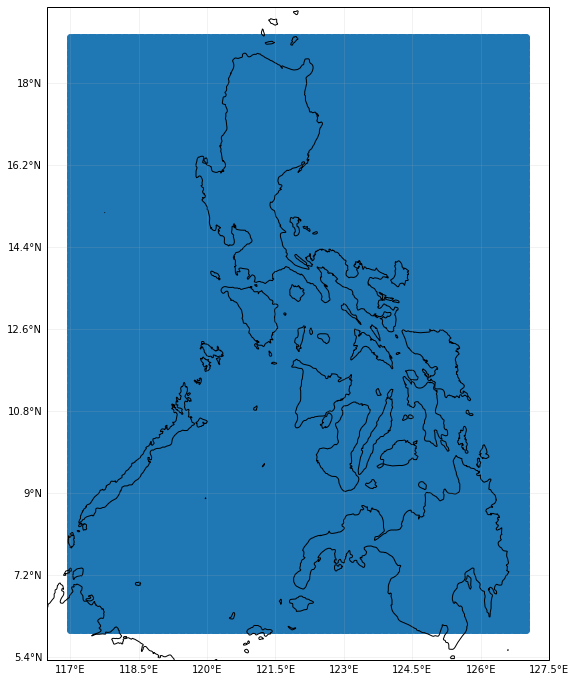

In [0]:
cent = Centroids()
grid_points=pd.read_csv("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/data-raw/grid_points_admin3_2021.csv")

cent.set_raster_from_pnt_bounds((117,6,127,19), res=0.05)
cent.check()
cent.plot()
threshold=10
df = pd.DataFrame(data=cent.coord)
df["centroid_id"] = "id"+(df.index).astype(str)  
centroid_idx=df["centroid_id"].values
ncents = cent.size
df=df.rename(columns={0: "lat", 1: "lon"})
#calculate wind field for each ensamble members 



In [0]:
data_windfield=dict()
data_track=dict()
for typhoon_name in list(dict_typhoones.keys()):
  list_intensity=[]
  distan_track=[]
  print(typhoon_name)
  fcast = TCForecast()
  fcast.data=[adjust_tracks(tr) for tr in xr_list if tr.name==typhoon_name] #filter per event 
  fcast.equal_timestep(3)

  #typhoon = TropCyclone()
  #track = TCTracks() 
  #track.data=[fcast.data[0]]
  #typhoon.set_from_tracks(track, cent, store_windfields=True)
  for tr in fcast.data:
    print(tr.sid)

    track = TCTracks() 
    typhoon = TropCyclone()
    track.data=[tr]
    typhoon.set_from_tracks(track, cent, store_windfields=True)
    windfield=typhoon.windfields
    nsteps = windfield[0].shape[0]
    centroid_id = np.tile(centroid_idx, nsteps)
    intensity_3d = windfield[0].toarray().reshape(nsteps, ncents, 2)
    intensity = np.linalg.norm(intensity_3d, axis=-1).ravel()
    
    timesteps = np.repeat(tr.time.values, ncents)
    timesteps = timesteps.reshape((nsteps, ncents)).ravel()
    inten_tr = pd.DataFrame({
        'centroid_id': centroid_id,
        'value': intensity,
        'timestamp': timesteps,
    })

    inten_tr = inten_tr[inten_tr.value > threshold]
    inten_tr['storm_id'] = tr.sid
    list_intensity.append(inten_tr)
    distan_track1=[]
    for index, row in df.iterrows():
        dist=np.min(np.sqrt(np.square(tr.lat.values-row['lat'])+np.square(tr.lon.values-row['lon'])))
        distan_track1.append(dist*111)
    dist_tr = pd.DataFrame({'centroid_id': centroid_idx,'value': distan_track1})
    dist_tr['storm_id'] = tr.sid
    distan_track.append(dist_tr)      
  data_windfield[typhoon_name]=list_intensity
  data_track[typhoon_name]=distan_track 


bopha
2021-05-25 21:38:46,255 - climada.hazard.tc_tracks - INFO - Interpolating 52 tracks to 3h time steps.
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"
/databricks/python/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
 "Passing ``keep_attrs`` to ``resample`` has no effect and wi

In [0]:
df_ = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat))
#df.to_crs({'init': 'epsg:4326'})
df_.crs = {'init': 'epsg:4326'}
df_admin = sjoin(df_, admin, how="left")
df_admin=df_admin.dropna()

/local_disk0/tmp/1621976382419-0/PythonShell.py:4: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

 # Databricks Python Shell

In [0]:
for keys in data_windfield.keys():
  df_intensity = pd.concat(data_windfield[keys])
  df_intensity=pd.merge(df_intensity, df_admin, how='outer', on='centroid_id')
  #df_intensity = gpd.GeoDataFrame(df_intensity, geometry=gpd.points_from_xy(df_intensity.lon, df_intensity.lat))
  df_intensity=df_intensity.dropna()
  #df_intensity = gpd.GeoDataFrame(df_intensity, geometry=gpd.points_from_xy(df_intensity.lon, df_intensity.lat))
  df_intensity=df_intensity[df_intensity['value'].gt(12)].groupby(['adm3_pcode','storm_id'],as_index=False).agg({"value":['count', 'max']}) 
  # rename columns
  df_intensity.columns = [x for x in ['adm3_pcode','storm_id','value_count','v_max']]
  #########################################################################################
  df_track = pd.concat(data_track[keys])
  df_track=pd.merge(df_track, df_admin, how='outer', on='centroid_id')
  df_track=df_track.dropna()
  df_track_=df_track.groupby(['adm3_pcode','storm_id'],as_index=False).agg({'value':'min'}) 
  df_track_.columns = [x for x in ['adm3_pcode','storm_id','dis_track_min']]#join_left_df_.columns.ravel()]
  typhhon_df = pd.merge(df_intensity, df_track_,  how='left', on=['adm3_pcode','storm_id']) 
  typhhon_df['typhoon']=typhoon_name
  typhhon_df.to_csv(os.path.join(results_folder ,'%s_intensity.csv'%keys))
  

In [0]:
%r
# IMPORT LIBRARY
library(stringr)
library(ggplot2)
library(dplyr)
library(tidyr)
library(httr)
library(sf)
library(raster)
library(randomForest)
library(rlang)
library(plyr)
library(lubridate)
library(ranger)
library(tmap)



main_directory<-'/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/'

source('/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib_r/settings.R')
source('/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib_r/data_cleaning_forecast.R')
source('/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/lib_r/track_interpolation.R')


geo_variable <- read.csv("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model//data/geo_variable.csv")
best_track_27ty<-read.csv("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model//data-raw/best_track_27ty.csv")
  
# load the IMPACT model
mode_classification <- readRDS("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model//models/final_model.rds")
mode_continious <- readRDS("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model//models/final_model_regression.rds")
 

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

 filter, lag

The following objects are masked from ‘package:base’:

 intersect, setdiff, setequal, union


Attaching package: ‘tidyr’

The following object is masked _by_ ‘.GlobalEnv’:

 complete

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 7.0.0
Loading required package: sp

Attaching package: ‘raster’

The following object is masked from ‘package:tidyr’:

 extract

The following object is masked from ‘package:dplyr’:

 select

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

 combine

The following object is masked from ‘package:ggplot2’:

 margin

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

 arrange, count, desc, failwith, id, mutate, rename, summarise,
 summarize


Attaching package: ‘lubridate’

The following objects are masked from ‘package:raster’:

 intersect, union

The following objects are masked from ‘package:dplyr’:

 intersect, setdiff, union

The following objects are masked from ‘package:base’:

 date, intersect, setdiff, union


Attaching package: ‘ranger’

The following object is masked from ‘package:randomForest’:

 importance

 Reading layer `phl_admin3_simpl2' from data source `/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/data-raw' using driver `ESRI Shapefile'
Simple feature collection with 1647 features and 6 fields
Geometry type: MULTIPOLYGON
Dimension: XY
Bounding box: xmin: 114.2779 ymin: 4.587294 xmax: 126.6048 ymax: 21.12181
Geodetic CRS: WGS 84
Reading layer `phl_admin1_gadm_pcode' from data source `/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/data-raw' using driver `ESRI Shapefile'
Simple feature collection with 17 features and 11 fields
Geometry type: MULTIPOLYGON
Dimension: XY
Bounding box: xmin: 116.9283 ymin: 4.58694 xmax: 126.6054 ymax: 21.07014
Geodetic CRS: WGS 84
Reading layer `phl_admin1_buffer' from data source `/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/data-raw' using driver `ESRI Shapefile'
Simple feature collection with 1 feature and 1 field
Geometry type: MULTIPOLYGON
Dimension: XY
Bounding box: xmin: 116.8484 ymin: 4.507234 xmax: 126.6853 ymax: 21.1499
Geodetic CRS: WGS 84

In [0]:
%r

#mode_classification1 <- readRDS(paste0(main_directory,"./models/xgboost_classify.rds"))
#mode_continious1 <- readRDS(paste0(main_directory,"./models/xgboost_regression.rds"))
  
#------------------------- define functions ---------------------------------

ntile_na <- function(x,n){
  notna <- !is.na(x)
  out <- rep(NA_real_,length(x))
  out[notna] <- ntile(x[notna],n)
  return(out)
}

# BUILD WIND DATA MATRIC FOR NEW TYPHOON 
results_folder="/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/past_typhoon_windfields"
files<-list.files(results_folder,pattern='_intensity.csv', all.files=FALSE,full.names=TRUE)
listdf<-list()
for(file_name in files){
  
  typhoon_wind <- read.csv(file_name)%>%dplyr::select(-typhoon)%>%  #there is a mistake in the column value for typhoon names so extracting typhoon names from filename
    dplyr::mutate(dis_track_min=ifelse(dis_track_min<1,1,dis_track_min),
                  typhoon=as.factor(strsplit(strsplit(file_name,'/')[[1]][10],'_')[[1]][1]),
                  Mun_Code=adm3_pcode,
                  pcode=as.factor(substr(adm3_pcode, 1, 10)))

  listdf[[file_name]] <-typhoon_wind
  
  
}
past_typhoon_wind<-bind_rows(listdf)

#################################################################
# BUILD RAIN DATA MATRIC FOR NEW TYPHOON 
past_typhoon_rain <- read.csv("/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/past_typhoon_windfields/PHL_admin3_zonal_statistics_2021_05_13.csv") 

past_typhoon_rain <- past_typhoon_rain%>%
  group_by(pcode,typhoon_name)%>%
  dplyr::summarise(rain_max=max(value)/10,rain_mean = mean(value)/10)%>%ungroup()%>%
  dplyr::mutate(Mun_Code=paste0(pcode,'0'),typhoon=as.factor(typhoon_name))


###################################################################### 
# BUILD HAZARD DATA MATRIC FOR NEW TYPHOON 
past_typhoon_hazard<-past_typhoon_wind%>%
  left_join(past_typhoon_rain,by = c("Mun_Code","typhoon"))%>%
  dplyr::mutate(typhoon_name=typhoon,
                typhoon_name=as.factor(typhoon_name),
                rainfall_24h=rain_max,
                dist_track=dis_track_min,
                gust_dur=0,
                sust_dur=0,
                vmax_gust=v_max*1.21*1.9*1.94384,  #knot(1.94384) and 1.21 is conversion factor for 10 min average to 1min average
                vmax_gust_mph=v_max*1.21*1.9*2,23694, #mph 1.9 is factor to drive gust and sustained wind 
                vmax_sust_mph=v_max*1.21*2,23694,
                vmax_sust=v_max*1.21*1.94384)%>%     #knot(1.94384) and 1.21 is conversion factor for 10 min average to 1min average 
  dplyr::select(Mun_Code,vmax_gust,vmax_gust_mph,vmax_sust_mph,vmax_sust,dist_track,rainfall_24h,gust_dur,sust_dur,rain_mean,storm_id,typhoon_name)

# BUILD DATA MATRIC FOR pre disaster indicators
data_pre_disaster <- geo_variable%>%
  left_join(material_variable2 %>% dplyr::select(-Region,-Province,-Municipality_City), by = "Mun_Code") %>%
  left_join(data_matrix_new_variables , by = "Mun_Code")


# BUILD DATA MATRIC FOR NEW TYPHOON 
data_new_typhoon <- past_typhoon_hazard%>%left_join(data_pre_disaster,by="Mun_Code")


data <- clean_typhoon_forecast_data_ensamble(data_new_typhoon) %>% na.omit() # Randomforests don't handle NAs, you can impute in the future 

model_input <- data %>% dplyr::select(-GEN_typhoon_name,
                -GEN_typhoon_id,
                -GEO_n_households,
                #-GEN_mun_code,
                -contains('DAM_'),
                -GEN_mun_name) 

# RUN MODEL
rm.predict.pr <- predict(mode_continious, data = model_input,
                                             predict.all = FALSE,
                                             num.trees = mode_continious$num.trees,
                                             type = "response",
                                             se.method = "infjack",
                                             quantiles = c(0.1, 0.5, 0.9), 
                                             seed = NULL, 
                                             num.threads = NULL, 
                                             verbose = TRUE)

FORECASTED_IMPACT_rr <- as.data.frame(rm.predict.pr['predictions'])# %>% dplyr::mutate(index= 1:length(rm.predict.pr['predictions']),impact=rm.predict.pr['predictions']) 

df_imact_forecast <- FORECASTED_IMPACT_rr %>% dplyr::mutate(index= 1:nrow(FORECASTED_IMPACT_rr),impact=predictions) %>%
left_join(data , by = "index") %>% dplyr::mutate(dist50=ifelse(WEA_dist_track >= 50,0,1),
                Damaged_houses=as.integer(GEO_n_households*impact*0.01))%>%
dplyr::select(index, 
              GEN_mun_code,
              GEO_n_households,
              GEN_typhoon_name,
              GEN_typhoon_id,
              WEA_dist_track,
              WEA_vmax_sust_mhp,
              dist50,
              Damaged_houses,
              impact)%>%drop_na()
        

In [0]:
%r


class_<-c("A","B","C","Low")

 all_impact <- df_imact_forecast%>%
   dplyr::mutate(dist50=ifelse(WEA_dist_track >= 50,0,1),Damaged_houses=as.integer(GEO_n_households*impact*0.01),
                 class_B = case_when(impact >= 5 & impact < 8 ~ "C",impact >= 8 & impact < 10 ~ "B",impact >= 10 ~ "A",TRUE ~ 'Low'))

 all_impact <- df_imact_forecast%>%
   dplyr::mutate(dist50=ifelse(WEA_dist_track >= 50,0,1),Damaged_houses=as.integer(GEO_n_households*impact*0.01),
                 class_B = case_when(Damaged_houses >= 1000 & impact < 5000 ~ "C",impact >= 5000 & impact < 10000 ~ "B",impact >= 10000 ~ "A",TRUE ~ 'Low'))
 
 
 


listdf<-list()
for(typhoonnames in unique(all_impact$GEN_typhoon_name)){
 
  
  typhoon_impact <- all_impact%>%filter(GEN_typhoon_name==typhoonnames)
  
  number_ensambles<-length(unique(typhoon_impact$GEN_typhoon_id))
  
  df <- typhoon_impact %>%group_by(GEN_mun_code)%>%
    group_map(~sapply(1:length(class_),function(i){.x %>% filter(class_B ==class_[i])%>% nrow*100/number_ensambles}))
  
 
  
  df <- data.frame(matrix(unlist(df), nrow=length(df), byrow=TRUE))
  names(df)<-class_
 df$adm3_pcode<-unique(typhoon_impact$GEN_mun_code)
  
  
  
  ######################
  
  df2<-aggregate(typhoon_impact$dist50, by=list(adm3_pcode=typhoon_impact$GEN_mun_code), FUN=sum)%>%
    dplyr::mutate(probability=100*x/number_ensambles)%>%dplyr::select(adm3_pcode,probability)
  
 listdf[[typhoonnames]] <-df%>%dplyr::mutate(typhoon=as.factor(typhoonnames))%>%left_join(df2,by="adm3_pcode")
  
}

past_impact<-bind_rows(listdf)%>%
  left_join(data%>%dplyr::select(GEN_mun_code,GEO_n_households),by=c('adm3_pcode'='GEN_mun_code'))


past_impact<-unique(past_impact)


past_impact2 <- past_impact%>%dplyr::mutate(B = A+B,C=A+B+C)

    

#'bopha','durian','fengshen','ketsana','washi','haiyan','hagupit','haima','nock-ten','mangkhut','kammuri','phanfone','vongfong','molave','goni'

typhoonname='mangkhut'
TRACK_DATA1<- best_track_27ty%>%
  filter(STORMNAME==toupper(typhoonname))%>%
  dplyr::select(YYYYMMDDHH,LAT,LON,VMAX,STORMNAME)#typhoon = paste0(TRACK_DATA$STORMNAME,substr(TRACK_DATA$YYYYMMDDHH, 1, 4)))

track <- track_interpolation(TRACK_DATA1)
#past_impact<-unique(past_impact)

event_impact<-past_impact2%>% filter(typhoon==typhoonname,probability>0) 
 

event_impact<-php_admin3%>%left_join(event_impact,by='adm3_pcode')

In [0]:
%r

#YYYYMMDDHH,LAT,LON,VMAX,STORMNAME
#---------------------- vistualize landfall location probability -------------------------------

tmap_mode(mode = "view")
tm_shape(event_impact) + tm_polygons(col = "probability", name='adm3_en',
                                       palette=c('#f1eef6','#d7b5d8','#df65b0','#dd1c77','#980043'),
                                       breaks=c(0,5,10,20,40,50),colorNA=NULL,
                                       labels=c('   < 5%','5 - 10%','10 - 20%','20 - 40%','   > 50%'),
                                       title=paste0("Tphoon- ", typhoonname," Probability for \n distance from Track < 50km"),
                                   alpha = 0.75,
                                       border.col = "black",lwd = 0.01,lyt='dotted')+
  tm_shape(track) +  
  tm_symbols(size=0.08,border.alpha = 0.75,col='#0c2c84') +
  tm_shape(php_admin3) + tm_borders(lwd = .4,col='#bdbdbd') + 
  
  tm_format("NLD")

#---------------------- vistualize impact probability -------------------------------

tmap_mode(mode = "view")#view

tm_shape(event_impact) + tm_polygons(col = "A", name='adm3_en',
                                   palette=c('#f1eef6','#d7b5d8','#df65b0','#dd1c77','#980043'),
                                   breaks=c(0,50,70,80,90,100),colorNA=NULL,
                                   labels=c('   < 50%','70 - 70%','70 - 80%','80 - 90%','   > 90%'),
                                   title=paste0("Tphoon- ", typhoonname," Probability for >10 % DAMAGE"),
                                   alpha = 0.75,
                                   border.col = "black",lwd = 0.01,lyt='dotted')+
  tm_shape(track) +  
  tm_symbols(size=0.01,border.alpha = 0.75,col='#0c2c84') +
  tm_shape(php_admin3) + tm_borders(lwd = .4,col='#bdbdbd') + 
  #tm_shape(goni_track) +tm_dots(size=0.1,border.alpha = 0.25,col='#bdbdbd')+
  tm_format("NLD")

tmap_mode(mode = "view")

tm_shape(event_impact) + tm_polygons(col = "B", name='adm3_en',
                                     palette=c('#f1eef6','#d7b5d8','#df65b0','#dd1c77','#980043'),
                                     breaks=c(0,50,70,80,90,100),colorNA=NULL,
                                     labels=c('   < 50%','70 - 70%','70 - 80%','80 - 90%','   > 90%'),
                                     title=paste0("Tphoon- ", typhoonname," Probability for >8 % DAMAGE"),
                                     alpha = 0.75,
                                     border.col = "black",lwd = 0.01,lyt='dotted')+
  tm_shape(track) +  
  tm_symbols(size=0.01,border.alpha = 0.75,col='#0c2c84') +
  tm_shape(php_admin3) + tm_borders(lwd = .4,col='#bdbdbd') + 
  #tm_shape(goni_track) +tm_dots(size=0.1,border.alpha = 0.25,col='#bdbdbd')+
  tm_format("NLD")

tmap_mode(mode = "view")

tm_shape(event_impact) + tm_polygons(col = "C", name='adm3_en',
                                     palette=c('#f1eef6','#d7b5d8','#df65b0','#dd1c77','#980043'),
                                     breaks=c(0,50,70,80,90,100),colorNA=NULL,
                                     labels=c('   < 50%','70 - 70%','70 - 80%','80 - 90%','   > 90%'),
                                     title=paste0("Tphoon- ", typhoonname," Probability for >5 % DAMAGE"),
                                     alpha = 0.75,
                                     border.col = "black",lwd = 0.01,lyt='dotted')+
  tm_shape(track) +  
  tm_symbols(size=0.01,border.alpha = 0.75,col='#0c2c84') +
  tm_shape(php_admin3) + tm_borders(lwd = .4,col='#bdbdbd') + 
  #tm_shape(goni_track) +tm_dots(size=0.1,border.alpha = 0.25,col='#bdbdbd')+
  tm_format("NLD")









In [0]:
import requests
import shutil

def download_file(url,rainfall_path):
    output_file= os.path.join(rainfall_path,url.split('/')[-1]+'.grib2')
    local_filename = output_file#url.split('/')[-1]
    with requests.get(url, stream=True) as r:
        with open(local_filename, 'wb') as f:
            shutil.copyfileobj(r.raw, f)

    return local_filename

def download_rainfall_nomads1(Input_folder,path,Alternative_data_point):
    """
    download rainfall 
    
    """
    #if not os.path.exists(os.path.join(Input_folder,'rainfall/')):
    #    os.makedirs(os.path.join(Input_folder,'rainfall/'))
    
    rainfall_path=os.path.join(Input_folder,'rainfall/')
 
    url='https://nomads.ncep.noaa.gov/pub/data/nccf/com/naefs/prod/gefs.%s/'% Input_folder.split('/')[-3][:-2] #datetime.now().strftime("%Y%m%d")
    url2='https://nomads.ncep.noaa.gov/pub/data/nccf/com/naefs/prod/gefs.%s/'% Alternative_data_point #datetime.now().strftime("%Y%m%d")
    
    def listFD(url, ext=''):
        page = requests.get(url).text
        soup = BeautifulSoup(page, 'html.parser')
        return [url + node.get('href') for node in soup.find_all('a') if node.get('href').split('/')[-2] in ['00','06','12','18']]#.endswith(ext)]
    
    try:        
        base_url=listFD(url, ext='')[-1]
        base_url_hour=base_url+'prcp_bc_gb2/geprcp.t%sz.pgrb2a.0p50.bc_' % base_url.split('/')[-2]
        time_step_list=['06','12','18','24','30','36','42','48','54','60','66','72']
        rainfall_24=[base_url_hour+'24hf0%s'%t for t in time_step_list]
        rainfall_06=[base_url_hour+'06hf0%s'%t for t in time_step_list]
        rainfall_24.extend(rainfall_06)
        for rain_file in rainfall_24:
            print(rain_file)
            output_file= os.path.join(rainfall_path,rain_file.split('/')[-1]+'.grib2')
            download_file(rain_file,rainfall_path)

    except:
        base_url=listFD(url2, ext='')[-1]
        base_url_hour=base_url+'prcp_bc_gb2/geprcp.t%sz.pgrb2a.0p50.bc_' % base_url.split('/')[-2]
        time_step_list=['06','12','18','24','30','36','42','48','54','60','66','72']
        rainfall_24=[base_url_hour+'24hf0%s'%t for t in time_step_list]
        rainfall_06=[base_url_hour+'06hf0%s'%t for t in time_step_list]
        rainfall_24.extend(rainfall_06)
        for rain_file in rainfall_24:
            output_file= os.path.join(rainfall_path,rain_file.split('/')[-1]+'.grib2')
            download_file(rain_file,rainfall_path)
            os.chdir(path)

            
def download_rainfall_DWD(rainfall_path):
    """
    download rainfall 
    
    """
    time_step_list=['006','012','018','024','030','036','042','048','054','060','066','072']
    if datetime.now().hour >17:
      base_url='http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/'+'fc_%s12icgle_'%datetime.now().strftime("%Y%m%d")
    else:
      base_url='http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/'+'fc_%s00icgle_'%datetime.now().strftime("%Y%m%d")
  
    rainfall_24=[base_url+'%s.grib'%t for t in time_step_list]
    #print(rainfall_24)
    try:
      for rain_file in rainfall_24:
        local_filename= os.path.join(rainfall_path,rain_file.split('/')[-1])
        print(rain_file)
        urllib.request.urlretrieve (rain_file,local_filename)
    except:
      print('download failed')
      pass




In [0]:
conda install -c conda-forge pynio

Anaconda Inc has modified their terms of service for anaconda repositories. In a potentially breaking change Databricks will soon remove default conda channel configuration on this runtime. Read more: https://docs.microsoft.com/azure/databricks/libraries/notebooks-python-libraries#manage-libraries-with-conda-commands
Python interpreter will be restarted.
Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with repodata from current_repodata.json, will retry with next repodata source.
Collecting package metadata (repodata.json): ...working... done
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... 
Building graph of deps: 0%| | 0/3 [00:00<?, ?it/s]
Examining @/linux-64::__glibc==2.27=0: 0%| | 0/3 [00:00<?, ?it/s]
Examining pynio: 33%|███▎ | 1/3 [00:00<00:00, 5932.54it/s] 
Examining defaults/linux-64::python==3.7.6=h0371630_2: 67%|██████▋ | 2/3 [00:09<00:04, 4.80s/it]
Examining defaults/linux-64::python==3.7.6=h0371630_2: 100%|██████████| 3/3 [00:09<00:00, 3.20s/it]
 

Determining conflicts: 0%| | 0/3 [00:00<?, ?it/s]
Examining conflict for pynio python: 0%| | 0/3 [00:00<?, ?it/s]
 
Found conflicts! Looking for incompatible packages.
This can take several minutes. Press CTRL-C to abort.
failed

UnsatisfiableError: The following specifications were found to be incompatible with each other:

Output in format: Requested package -> Available versions

--------------------------------------------------------------------------- 
 CalledProcessError Traceback (most recent call last)
 <command-2068402369910965> in <module> 
 ----> 1 get_ipython ( ) . run_line_magic ( 'conda' , 'install -c conda-forge pynio' ) 

 /databricks/python/lib/python3.7/site-packages/IPython/core/interactiveshell.py in run_line_magic (self, magic_name, line, _stack_depth) 
 2315 kwargs [ 'local_ns' ] = sys . _getframe ( stack_depth ) . f_locals
 2316 with self . builtin_trap : 
 -> 2317 result = fn ( * args , ** kwargs ) 
 2318 return result
 2319 

 </databricks/python/lib/python3.7/site-packages/decorator.py:decorator-gen-117> in conda (self, line) 

 /databricks/python/lib/python3.7/site-packages/IPython/core/magic.py in <lambda> (f, *a, **k) 
 185 # but it's overkill for just that one bit of state. 
 186 def magic_deco ( arg ) : 
 --> 187 call = lambda f , * a , ** k : f ( * a , ** k ) 
 188 
 189 if callable ( arg ) : 

 /local_disk0/tmp/1621522626914-0/PythonShellImpl.py in conda (self, line) 
 426 @ line_magic
 427 def conda ( self , line ) : 
 --> 428 self . condaMagicHandler . runCmd ( "conda" , line ) 
 429 
 430 @ line_magic

 /local_disk0/tmp/1621522626914-0/PythonShellImpl.py in runCmd (self, magicCmd, line) 
 451 self . python_shell . entry_point . restartInterpAfterExecution ( ) 
 452 if parsedResult . rewrittenCommand ( ) : 
 --> 453 self . executeCondaCommand ( parsedResult ) 
 454 envState . postExecute ( parsedResult , self . python_shell . currentJobGroup ) 
 455 if parsedResult . isMutation ( ) : 

 /local_disk0/tmp/1621522626914-0/PythonShellImpl.py in executeCondaCommand (self, result) 
 502 sys . stdout . flush ( ) 
 503 if returncode != 0 : 
 --> 504 raise subprocess . CalledProcessError ( returncode , origCmd ) 
 505 finally : 
 506 end = time . time ( ) 

 CalledProcessError : Command 'conda install -c conda-forge pynio' returned non-zero exit status 1.

In [0]:
import shutil
import tempfile
import urllib.request
import xarray as xr

with urllib.request.urlopen('http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_006.grib') as response:
    with tempfile.NamedTemporaryFile(delete=False) as tmp_file:
        shutil.copyfileobj(response, tmp_file)

ds = xr.open_dataset(tmp_file, engine="pynio")

In [0]:
tmp_file

Out[30]: <tempfile._TemporaryFileWrapper at 0x7f7853180690>

In [0]:
rain_file='http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_006.grib'
local_filename= os.path.join(rainfall_path,rain_file.split('/')[-1])
print(rain_file)
urllib.request.urlretrieve ('http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_006.grib',local_filename)

http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_006.grib
Out[31]: ('/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/temp/fc_2021052000icgle_006.grib',
 <http.client.HTTPMessage at 0x7f785317b5d0>)

In [0]:
rainfall_path='/dbfs/mnt/TyphoonData/typhoon/Bronze/TyphoonModel/Typhoon-Impact-based-forecasting-model/temp'

In [0]:
download_rainfall_DWD(rainfall_path)

['http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_006.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_012.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_018.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_024.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_030.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_036.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_042.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_048.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_054.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_060.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_066.grib', 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_072.grib']
http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052000icgle_006.grib
download failed

In [0]:
 base_url='http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/'+'fc_%s12icgle_'%datetime.now().strftime("%Y%m%d")

In [0]:
base_url

Out[23]: 'http://opendata.dwd.de/weather/wmc/icon-eps/data/grib/fc_2021052012icgle_'